# **Este *ipynb* está enmarcado dentro de un trabajo que busca predecir qué alumnos del departamento de Sistemas la UTN FRBA desertarán.**

Los datos disponibles fueron unificados en una sola tabla y se removieron los registros con valores nulos.

En este **ipynb** se utilizarán herramientas del aprendizaje estadístico para crear un modelo supervisado que prediga el outcome de la variable 'deserto'.

## **Importación de librerías**

In [ ]:
## Importamos librerías para manipulación de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Importamos librerías de aprendizaje automático.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importamos librerías para poder crear Pipelines.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Importamos librerias de PCA.
from sklearn.decomposition import PCA

## **Google Colaboratory o Local**
El notebook podrá ser corrido tanto localmente como en Google Colaboratory.

El usuario deberá modificar el root path de acuerdo a su conveniencia.

In [ ]:
## Verificamos si estamos corriendo el noteboock en Google Colaboratory.
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)

## En el caso de estar en Google Colab, montamos nuestro Drive.
if var_google_colab:
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  ## Direccion root donde está el notebook.
  root_path = "/content/gdrive/MyDrive/Colab Notebooks/GIAR/"

## En el caso de no estar en Google Colab, estamos corriendo localmente el notebook.
else:
  root_path = ""

True
Mounted at /content/gdrive


## **Dataset**


In [ ]:
## Importamos el dataset.
df = pd.read_csv(root_path + 'datos/base_datos_estudiantes00.csv')

## **PREPOCESAMIENTO**

In [ ]:
df['Descripción de recursada regular_Recurso n Veces (>5)'].value_counts()

0.0    3914
Name: Descripción de recursada regular_Recurso n Veces (>5), dtype: int64

In [ ]:
## Imprimimos las dimensiones del dataset.
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (3914, 29)


In [ ]:
## Calculamos el Sample to Feature Ratio (S2FR) y lo imprimimos.
S2FR = df.shape[0] / (df.shape[1]-2)
S2FR

144.96296296296296

In [ ]:
## Dividimos el dataset en la variable dependiente "y", en este caso "deserto", y las independientes "x".
y = np.array(df[["deserto"]])
x = df.drop(['Codigo Alumno','deserto'], axis=1)

In [ ]:
## Diferenciamos las variables numéricas de las categóricas.
num_features = ['edad al ingreso', 
                'Ciclo Lectivo de Cursada',
                'Cantidad de veces recursada regular',
                'Descripción de recursada regular_No Recurso', 
                'Descripción de recursada regular_Recurso 1 Vez', 
                'Descripción de recursada regular_Recurso 2 Veces', 
                'Descripción de recursada regular_Recurso 3 Veces', 
                'Descripción de recursada regular_Recurso 4 Veces', 
                'Descripción de recursada regular_Recurso 5 Veces', 
                'Descripción de recursada regular_Recurso n Veces (>5)', 
                'noAprobado', 
                'Aprobado', 
                'Promociono', 
                'Nota', 
                'Nota_max_prom', 
                'Indice_aprobacion', 
                'Turno_Mañana', 
                'Turno_Noche', 
                'Turno_Tarde', 
                'Tipo de aprobación_Cambio Curso', 
                'Tipo de aprobación_Firmo', 
                'Tipo de aprobación_Libre', 
                'Tipo de aprobación_No Firmo', 
                'Tipo de aprobación_Promociono',
                'cantidad de años']

cat_features = ['EsTecnico', 'Sexo']

In [ ]:
## Separamos el dataset en train y test. Corresponderán a test el 30% de las muestras.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=3090, random_state=4)

In [ ]:
xtrain.shape

(3090, 27)

In [ ]:
xtest.shape

(824, 27)

In [ ]:
pd.DataFrame(ytrain).value_counts(normalize = True)

0    0.58835
1    0.41165
dtype: float64

In [ ]:
pd.DataFrame(ytest).value_counts(normalize = True)

0    0.584951
1    0.415049
dtype: float64

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
xtrain_over, ytrain_over = oversample.fit_resample(xtrain, ytrain)

In [ ]:
xtrain_over.shape

(3636, 27)

In [ ]:
pd.DataFrame(ytrain_over).value_counts(normalize=True)

0    0.5
1    0.5
dtype: float64

In [ ]:
xtrain_over.head()

,EsTecnico,Ciclo Lectivo de Cursada,edad al ingreso,Turno_Mañana,Turno_Noche,Turno_Tarde,Tipo de aprobación_Cambio Curso,Tipo de aprobación_Firmo,Tipo de aprobación_Libre,Tipo de aprobación_No Firmo,...,Descripción de recursada regular_Recurso 4 Veces,Descripción de recursada regular_Recurso 5 Veces,Descripción de recursada regular_Recurso n Veces (>5),noAprobado,Aprobado,Promociono,Nota,Nota_max_prom,Indice_aprobacion,cantidad de años
0,1.0,2014.0,20.0,14.0,1.0,3.0,0.0,5.0,3.0,8.0,...,0.0,0.0,0.0,0.0,4.0,2.0,7.500000,7.500000,1.000000,1.0
1,1.0,2010.0,18.0,4.0,6.0,8.0,3.0,2.0,10.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.000000,2.000000,0.000000,1.0
2,0.0,2010.0,19.0,7.0,11.0,1.0,0.0,4.0,6.0,9.0,...,1.0,0.0,0.0,2.0,4.0,0.0,3.833333,4.200000,0.666667,2.0
3,0.0,2014.0,18.0,15.0,6.0,4.0,1.0,14.0,3.0,6.0,...,0.0,0.0,0.0,2.0,11.0,1.0,5.461538,5.750000,0.846154,3.0
4,0.0,2014.0,18.0,0.0,3.0,10.0,0.0,6.0,0.0,4.0,...,0.0,0.0,0.0,1.0,7.0,3.0,5.625000,6.142857,0.875000,1.0


In [ ]:
## Definimos las transformaciones a realizar para las variables numéricas. 
## Las estandarizaremos utilizando StandardScaler.
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

## Definimos la transformación a realizar para las variables categóricas.
do_nothing = FunctionTransformer(lambda x: x)

## Definimos el ColumnTransformer que será ejecutado al momento del fitting.
preprocesamiento = ColumnTransformer(
    transformers=[ 
        ("num", numeric_transformer, num_features),
        ("cat", do_nothing, cat_features)
    ]
)

In [ ]:
## Matriz X al aplicar el preprosesamiento definido.
normalize_xtrain_over = pd.DataFrame(preprocesamiento.fit_transform(xtrain_over))

In [ ]:
normalize_train_over = pd.concat([pd.DataFrame(ytrain_over),normalize_xtrain_over], axis=1)

In [ ]:
normalize_xtrain_over.shape

(3636, 27)

In [ ]:
normalize_train_over.head()

,0,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,0,0.185336,0.565606,0.127560,-0.566712,0.459592,0.378871,-0.394703,-0.251554,-0.148475,...,-0.822342,-0.423070,-0.558779,-0.550640,-0.149945,0.357659,0.102613,-0.836686,1.0,0.0
1,1,-0.649710,-2.173713,-0.817539,-0.680795,-0.595381,-0.662380,-0.394703,-0.251554,-0.148475,...,-0.172476,0.788176,0.672319,-0.895518,1.744051,-0.743855,-0.942488,-0.836686,1.0,0.0
2,1,-0.232187,-2.173713,0.600109,-0.680795,0.459592,-0.662380,-0.394703,2.946529,-0.148475,...,0.477391,-0.907569,-0.558779,-0.665599,0.661767,0.577962,-0.942488,-0.299102,0.0,0.0
3,0,-0.649710,0.565606,0.363835,0.003702,0.987079,0.378871,-0.394703,-0.251554,-0.148475,...,-0.172476,-0.180821,-0.148413,0.483992,-0.149945,-0.082947,-0.419938,0.238483,0.0,1.0
4,0,-0.649710,0.565606,-0.581265,-0.338546,-0.067894,-0.662380,-0.394703,-0.251554,-0.148475,...,-0.562396,1.272675,-0.558779,-0.435681,-0.961657,-0.523553,0.625164,-0.836686,0.0,0.0


In [ ]:
## Calculamos la matriz de correlación lineal de Pearson.
corr = normalize_train_over.corr()
# Imprimimos el heatmap.
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(corr, annot = True, fmt = '.2f')

Output hidden; open in https://colab.research.google.com to view.

##**Pipeline de Machine Learning**

In [ ]:
## Creamos un Pipeline para aplicar secuencialmente la lista de transformaciones definida previamente y un estimador final.
pipeline1 = Pipeline(
    steps=[("preprocesamiento",preprocesamiento),("estimador",SVC(probability=True))]
)

In [ ]:
## Definimos los hiperparámetros de los modelos a comparar.
parametros = [
    {
        "estimador": (SVC(probability=True),),
          "estimador__kernel":('linear', 'rbf'), 
          "estimador__C":(1, 10, 100, 1000), 
          "estimador__gamma":(0.001, 0.0001)          
    }
]

In [ ]:
## Creamos el Grid Search + Cross Validation.
grid_search1 = GridSearchCV(pipeline1, parametros,
                  refit = True, ##Refit nos devuelve el modelo con los mejores parametros encontrados.
                   cv = 5,      ## Indica la cantidad de folds.
                   verbose=40)

In [ ]:
## Implementamos el GSCV con el set de train.
grid_search1.fit(xtrain_over,ytrain_over.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 1/5; 1/16] END estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.848 total time=   1.9s
[CV 2/5; 1/16] START estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 2/5; 1/16] END estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.834 total time=   1.4s
[CV 3/5; 1/16] START estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 3/5; 1/16] END estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.850 total time=   1.4s
[CV 4/5; 1/16] START estimador=SVC(probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 4/5; 1/16

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['edad '
                                                                          'al '
                                                                          'ingreso',
                                                                          'Ciclo '
                                                                          'Lectivo '
                                                                          'de '
                                                                          'Cursada',
                                                  

In [ ]:
## Guardamos en una variable toda la informacion del entrenamiento que quedó registrada en 'cv_results_'.
scores = grid_search1.cv_results_

## Imprimimos la informacion del entrenamiento.
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.449176,0.205228,0.026174,0.000969,"SVC(C=100, gamma=0.001, probability=True)",1,0.001,linear,"{'estimador': SVC(C=100, gamma=0.001, probabil...",0.847527,0.833563,0.850069,0.848693,0.850069,0.845984,0.006283,9
1,1.759993,0.417085,0.100314,0.023461,"SVC(C=100, gamma=0.001, probability=True)",1,0.001,rbf,"{'estimador': SVC(C=100, gamma=0.001, probabil...",0.820055,0.788171,0.823934,0.825309,0.807428,0.812979,0.013917,15
2,1.605027,0.291225,0.030102,0.009278,"SVC(C=100, gamma=0.001, probability=True)",1,0.0001,linear,"{'estimador': SVC(C=100, gamma=0.001, probabil...",0.847527,0.833563,0.850069,0.848693,0.850069,0.845984,0.006283,9
3,2.463458,0.294312,0.139745,0.036307,"SVC(C=100, gamma=0.001, probability=True)",1,0.0001,rbf,"{'estimador': SVC(C=100, gamma=0.001, probabil...",0.759615,0.753783,0.749656,0.752407,0.763411,0.755775,0.005016,16
4,5.705890,0.386029,0.031005,0.009179,"SVC(C=100, gamma=0.001, probability=True)",10,0.001,linear,"{'estimador': SVC(C=100, gamma=0.001, probabil...",0.844780,0.837689,0.852820,0.852820,0.852820,0.848186,0.006102,4


In [ ]:
## Imprimimos cual fue la mejor combinación de hiperparámetros.
print("Con un score de %0.4f, la mejor combinación de hiperparámtros fue: \n %s" % (grid_search1.best_score_, grid_search1.best_params_))

Con un score de 0.8496, la mejor combinación de hiperparámtros fue: 
 {'estimador': SVC(C=100, gamma=0.001, probability=True), 'estimador__C': 100, 'estimador__gamma': 0.001, 'estimador__kernel': 'rbf'}


In [ ]:
## Obtenemos las predicciones a partir del modelo entrenado.
ypred = grid_search1.predict(xtest)
print(ypred)

[1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 0 0 0 0 1 0 

##**Mediciones de desempeño**##

In [ ]:
## Calculamos el accuracy.
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8531553398058253


In [ ]:
## Computamos el área abajo de la curva ROC.
yproba = grid_search1.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest.astype(int), yproba[:,1], drop_intermediate = False, pos_label=1)
auc_value = auc(fpr, tpr)
print("El AUC es = " + str(auc_value))

El AUC es = 0.9175462861857271


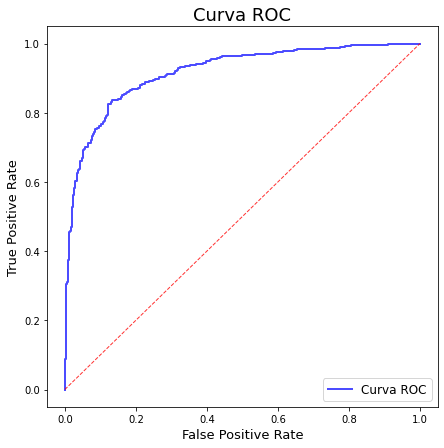

In [ ]:
## Imprimimos la curva ROC.
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, lw=2, alpha=0.7 , label = 'Curva ROC', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(False)
plt.legend(loc="lower right",fontsize=12)
plt.title('Curva ROC',fontsize=18)
plt.show()

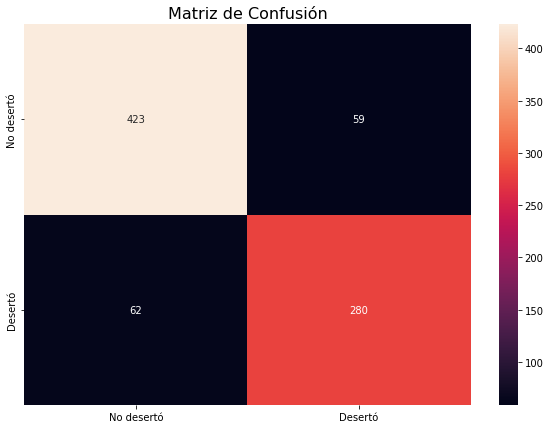

In [ ]:
## Calculamos e imprimimos la Matriz de Confusión.
cm = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(cm, index = ['No desertó', 'Desertó'], columns = ['No desertó', "Desertó"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de Confusión', fontsize=16)
plt.show()


##**Analisis de Componentes Pricipales**

In [ ]:
## Fijamos el porcentaje de varianza que deberán explicar los autovectores que se seleccionarán. 
n_comps = 0.8

## Definimos el PCA.
pca = PCA(n_components= n_comps)

In [ ]:
## Definimos las transformaciones a realizar para las variables numéricas. 
## Las estandarizaremos utilizando StandardScaler y luego aplicamos el método PCA.
numeric_transformer2 = Pipeline(
    steps=[("scaler", StandardScaler()), ("pca", pca)]
)

## Juntamos las transformaciones definidas previamente.
## Definimos el ColumnTransformer que será ejecutado al momento del fitting.
preprocesamiento2 = ColumnTransformer(
    transformers=[ 
        ("num", numeric_transformer2, num_features),
        ("cat", do_nothing, cat_features)
    ]
)

## Definimos un nuevo pipeline que incluye el método PCA en el preprosemiento.
pipeline2=Pipeline(
    steps=[('preprocesamiento',preprocesamiento2),('estimador',SVC())]
)

In [ ]:
## Observamos como queda el dataset que se obtine a partir de la reducción de la dimensionalidad.
pd.DataFrame(preprocesamiento2.fit_transform(xtrain_over))

,0,1,2,3,4,5,6,7,8,9,10
0,-0.565033,-0.975401,2.079077,-0.429565,0.154742,-0.841384,-0.614052,0.121129,0.850866,1.0,0.0
1,-3.560339,1.475635,-3.616710,-0.465693,-1.182973,0.566444,1.406723,0.503204,-1.655369,1.0,0.0
2,-2.099818,1.885465,-0.610921,1.060594,1.408170,-0.618640,1.417833,-0.404445,-1.810244,0.0,0.0
3,0.426637,0.376977,-0.001846,-0.363756,-0.210015,-0.942286,0.046040,0.322432,0.380598,0.0,1.0
4,-0.594147,-1.638208,0.089882,-0.939730,0.024354,0.525766,-1.534203,1.275988,-0.729814,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3631,-2.695935,-1.303649,-1.506780,0.185928,0.629669,-0.441298,0.652121,0.195148,-0.739684,0.0,0.0
3632,-3.043632,1.888273,-3.208700,0.358899,-0.526936,0.486196,-0.463385,-0.308779,1.109740,1.0,0.0
3633,-2.585550,1.189938,-2.040720,1.402422,0.172148,-1.244927,0.489049,0.410533,-0.174875,1.0,0.0
3634,-1.905939,-1.911449,0.825674,1.985020,-0.577323,0.570922,-0.371885,-0.288867,0.165402,1.0,0.0


In [ ]:
## Creamos el nuevo GSCV.
grid_search2 = GridSearchCV(pipeline2, parametros,
                  refit = True, 
                   cv = 5,
                   verbose=40)

In [ ]:
## Implementamos el GSCV.
grid_search2.fit(xtrain_over,ytrain_over.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 1/5; 1/16] END estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.815 total time=   1.6s
[CV 2/5; 1/16] START estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 2/5; 1/16] END estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.772 total time=   1.5s
[CV 3/5; 1/16] START estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear
[CV 3/5; 1/16] END estimador=SVC(C=100, gamma=0.001, probability=True), estimador__C=1, estimador__gamma=0.001, estimador__kernel=linear;, score=0.798 total time=   1.6s
[CV 4/5; 1/1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8))]),
                                                                         ['edad '
                                                                          'al '
                                                                          'ingreso',
                                                                          'Ciclo '
                                                                          'Lectivo '
    

In [ ]:
## Guardamos en una variable toda la informacion del entrenamiento que quedó registrada en 'cv_results_'.
scores2 = grid_search2.cv_results_

## Imprimimos la informacion del entrenamiento.
scores2_df = pd.DataFrame.from_dict(scores)
scores2_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimador,param_estimador__C,param_estimador__gamma,param_estimador__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.449176,0.205228,0.026174,0.000969,"SVC(C=1000, gamma=0.001, probability=True)",1,0.001,linear,"{'estimador': SVC(C=1000, gamma=0.001, probabi...",0.847527,0.833563,0.850069,0.848693,0.850069,0.845984,0.006283,9
1,1.759993,0.417085,0.100314,0.023461,"SVC(C=1000, gamma=0.001, probability=True)",1,0.001,rbf,"{'estimador': SVC(C=1000, gamma=0.001, probabi...",0.820055,0.788171,0.823934,0.825309,0.807428,0.812979,0.013917,15
2,1.605027,0.291225,0.030102,0.009278,"SVC(C=1000, gamma=0.001, probability=True)",1,0.0001,linear,"{'estimador': SVC(C=1000, gamma=0.001, probabi...",0.847527,0.833563,0.850069,0.848693,0.850069,0.845984,0.006283,9
3,2.463458,0.294312,0.139745,0.036307,"SVC(C=1000, gamma=0.001, probability=True)",1,0.0001,rbf,"{'estimador': SVC(C=1000, gamma=0.001, probabi...",0.759615,0.753783,0.749656,0.752407,0.763411,0.755775,0.005016,16
4,5.705890,0.386029,0.031005,0.009179,"SVC(C=1000, gamma=0.001, probability=True)",10,0.001,linear,"{'estimador': SVC(C=1000, gamma=0.001, probabi...",0.844780,0.837689,0.852820,0.852820,0.852820,0.848186,0.006102,4


In [ ]:
## Imprimimos cual fue el mejor modelo (estimator) y combinación de hiperparámetros.
print("Con un score de %0.4f, la mejor combinación de hiperparámtros fue: \n %s" % (grid_search2.best_score_, grid_search2.best_params_))

Con un score de 0.8050, la mejor combinación de hiperparámtros fue: 
 {'estimador': SVC(C=1000, gamma=0.001, probability=True), 'estimador__C': 1000, 'estimador__gamma': 0.001, 'estimador__kernel': 'rbf'}


In [ ]:
## Obtenemos las predicciones a partir del modelo entrenado.
ypred2 = grid_search2.predict(xtest)
print(ypred2)

[1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 

In [ ]:
## Calculamos el accuracy.
test_acc = accuracy_score(ytest, ypred2)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8191747572815534


In [ ]:
## Computamos el área abajo de la curva ROC.
yproba2 = grid_search2.predict_proba(xtest)
fpr2, tpr2, thresholds = roc_curve(ytest.astype(int), yproba2[:,1], drop_intermediate = False, pos_label=1)
auc_value = auc(fpr2, tpr2)
print("El AUC es = " + str(auc_value))

El AUC es = 0.8777783844119288


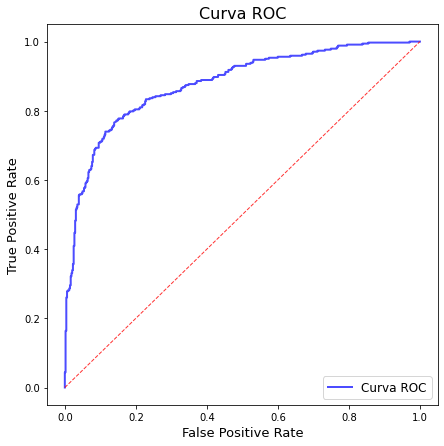

In [ ]:
## Imprimimos la curva ROC.
plt.figure(figsize=(7,7))
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'Curva ROC', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(False)
plt.legend(loc="lower right", fontsize=12)
plt.title('Curva ROC', fontsize=16)
plt.show()

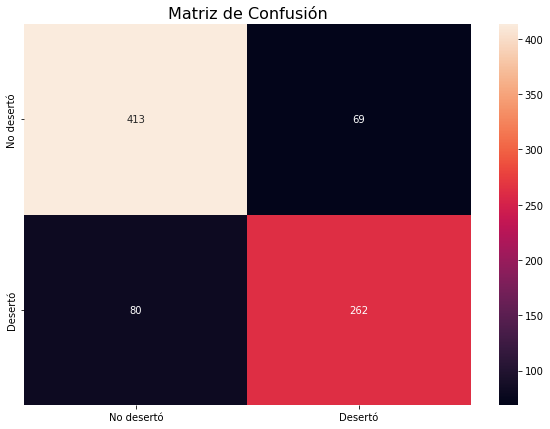

In [ ]:
## Calculamos e imprimimos la Matriz de Confusión.
cm = confusion_matrix(ytest, ypred2)
df_cm = pd.DataFrame(cm, index = ['No desertó', 'Desertó'], columns = ['No desertó', "Desertó"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de Confusión', fontsize=16)
plt.show()